# **Introduction & Data Description**
   - **Project Overview:**
       - Objective: Predicting the closing stock price of NASDAQ: NVDA for the trading days from 25 October to 7 November.
       - Methodologies: ARIMA Models.

In [443]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [444]:
data = yf.download("NVDA", start="2023-3-15", end="2023-10-24",  interval = "1d")

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-15,237.610001,242.860001,233.600006,242.279999,242.234970,52448600
2023-03-16,240.270004,255.880005,238.940002,255.410004,255.362534,58325300
2023-03-17,259.820007,263.989990,256.679993,257.250000,257.202209,84854700
2023-03-20,256.149994,260.239990,251.300003,259.000000,258.951874,43274700
2023-03-21,261.799988,263.920013,253.809998,261.989990,261.941315,54740800
...,...,...,...,...,...,...
2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300
2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400
2023-10-19,428.109985,432.970001,418.820007,421.010010,421.010010,50123300


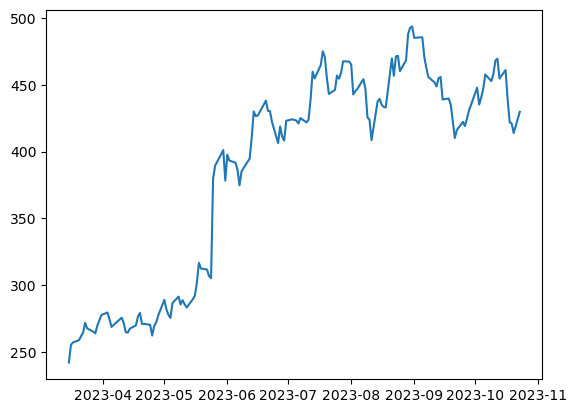

In [445]:
plt.plot(data['Close'])
data

In [446]:
df = data[["Close"]].dropna()
df.index = pd.to_datetime(df.index)
df.describe()
df

,Close
Date,
2023-03-15,242.279999
2023-03-16,255.410004
2023-03-17,257.250000
2023-03-20,259.000000
2023-03-21,261.989990
...,...
2023-10-17,439.380005
2023-10-18,421.959991
2023-10-19,421.010010


# **Model selection: ARIMA model, Reasoning and Justification**

### 1. **Simplicity and Interpretability:**
- **Easy Understanding:** ARIMA is a linear model, which makes it relatively simple to understand and explain.
- **Components:** ARIMA can explicitly model patterns in the data through its three components: AR (autoregression), I (integrated), and MA (moving average). Each component targets a specific type of correlation structure in the data.

### 2. **Modeling Stationary Time Series:**
- **Differencing:** ARIMA can handle non-stationary data through differencing (the "I" in ARIMA), which removes trends and seasonality to make the data stationary.
- **Auto-Correlation Structure:** ARIMA models the autocorrelation structure in the data, which is often present in financial time series.

### 3. **Flexibility:**
- **Parameter Tuning:** By adjusting the parameters (p, d, q), one can model different time series behaviors.
- **Extensions:** Variants like Seasonal ARIMA (SARIMA) can handle seasonality, and ARIMAX can include exogenous variables.

### 4. **Economic Theory:** 
- **Random Walk Hypothesis:** Stock prices are often modeled as a random walk, which can be represented as a simple form of ARIMA, specifically an ARIMA(0,1,0).

### 5. **Widely Used and Studied:**
- **Historical Success:** In certain situations, ARIMA has been successful in modeling stock prices.
- **Availability of Resources:** Given its widespread use, there are numerous resources, tutorials, and software packages available for ARIMA modeling.

### 6. **Diagnostic Tools:**
- **Model Evaluation:** Tools like ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots can help diagnose the appropriateness of the model.
- **Residual Analysis:** The residuals of the model can be analyzed to ensure that no patterns are left unmodeled.

### Caveats and Considerations:

a. **Efficient Market Hypothesis:** In efficient markets, stock prices reflect all available information, making them difficult to predict using historical prices alone. Many believe that stock prices resemble a random walk, where future price changes are independent of past changes.

b. **Dynamic Influences:** Stock prices are influenced by a plethora of dynamic factors, many of which cannot be captured by ARIMA's structure. Factors such as macroeconomic indicators, company news, geopolitical events, etc., play a role.

c. **Model Limitations:** ARIMA is primarily suited for short-term forecasts. Over longer horizons, the model's accuracy might deteriorate.


In conclusion, while ARIMA can provide insights into stock price movements and is useful for its simplicity and ease of interpretation, it's essential to be aware of its limitations. When predicting stock prices, it might be prudent to use a combination of models and techniques, considering both historical data and external factors.

# **Parameter Tuning (p, d, q) for ARIMA model**

### 1. **Determination of the order of differencing (d):** 
- The goal is to make the series stationary.
    - **Plot the Series:** Look for trends or seasonality.
    - **Differencing:** Apply first differencing (subtracting the previous observation from the current observation) and check if the resultant series is stationary using a test like the Augmented Dickey-Fuller (ADF) test.
    - **Repeat if Necessary:** If the series is still non-stationary after first differencing, you may need to difference again (second differencing). In most cases, \(d\) will be 0, 1, or 2.

### 2. **Determination of (p) and (q):**
- **ACF and PACF Plots:** After the series is made stationary, plot the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF).
    - **PACF:** Can help determine the value of (p). Look for the lag after which most of the partial autocorrelations are close to zero.
    - **ACF:** Can help determine the value of (q). Look for the lag after which most of the autocorrelations are close to zero.

### 3. **Grid Search:** 
- Use a systematic approach to search for the model that gives the best performance according to a predefined criterion.
    - **Specify Ranges:** For (p), (d), and (q) based on the above steps and your data.
    - **Fit Models:** For each combination of parameters.
    - **Evaluate:** Use criteria like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion). Lower AIC/BIC values indicate better performing models.
    - **Cross-validation:** This can also be used for a more robust assessment of the model's performance on unseen data.

### 4. **Residual Diagnostics:**
- Once you have selected a model, check the residuals.
    - **Residual Plot:** Should look like white noise (i.e., show no discernible pattern).
    - **ACF of Residuals:** Should not show significant autocorrelation.
    - **Histogram or QQ Plot:** Residuals should be approximately normally distributed.

### 5. **Out-of-Sample Testing:**
- **Split the Data:** Divide the data into a training set and a testing set.
- **Train and Forecast:** Fit the ARIMA model to the training set and forecast for the length of the testing set.
- **Compare:** Assess how well the forecasts match the real out-of-sample observations. Use metrics like Mean Absolute Percentage Error (MAPE), Root Mean Square Error (RMSE), etc.

In conclusion, selecting the parameters \(p\), \(d\), and \(q\) for ARIMA involves a mix of statistical tools, plots, and iterative refinement. It's a combination of art and science. And always remember, the best model according to in-sample criteria like AIC may not always be the best forecasting model for out-of-sample predictions.

# **Examining Stationary & Determining param p,d,q**
I will use the Augmented Dickey-Fuller test to check if the data is stationary or not. 
- If the p-value is less than 0.05, we can reject the null hypothesis and say that the data is stationary.
- If the ADF statistic is less than the critical value, we can reject the null hypothesis and say that the data is stationary.

critical value of ADF statistic:
- 1%: -3.430
- 5%: -2.861
- 10%: -2.566

In [447]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df.Close.dropna())
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])

ADF Statistic: -1.741937
p-value: 0.409645


### Intrepretation of ADF statistic:
- ADF statistic > critical value: data is non-stationary
- p-value > 0.05: data is non-stationary

**Overall: data is non-stationary, thus need to difference the data to make it stationary.**

1. Original data without differencing 

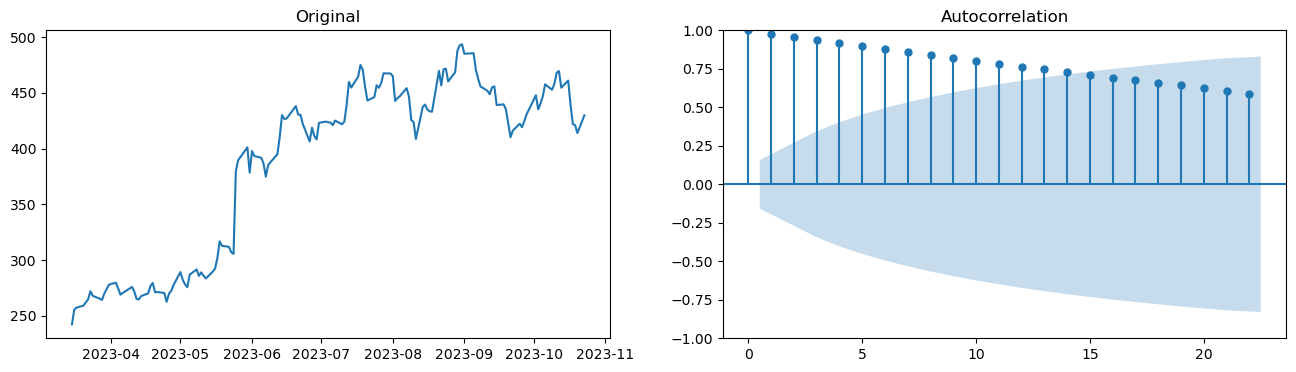

In [448]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(df.Close, ax=ax2);

2. 1st order differencing

In [449]:
from pmdarima.arima.utils import ndiffs

# Estimate the number of differences 'd' using an ADF test:
ndiffs(df.Close, test='adf')

1

/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


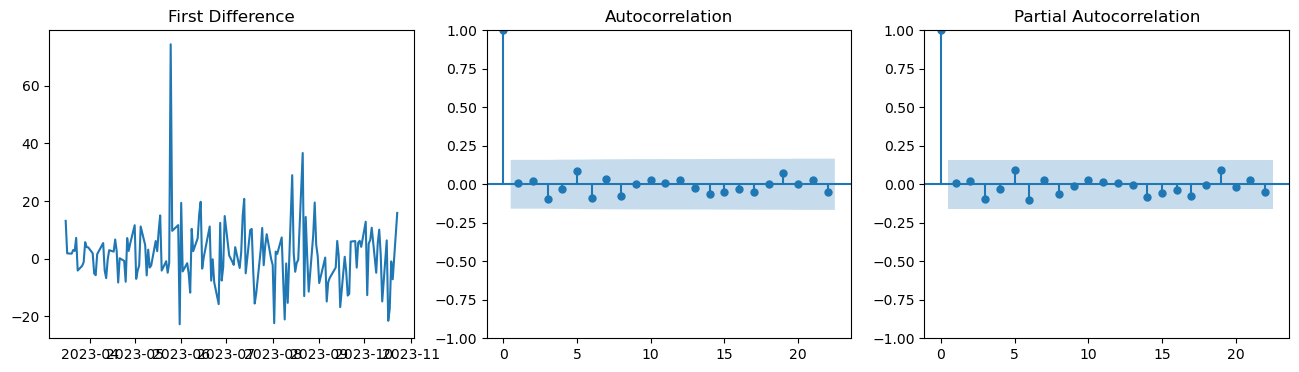

In [450]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("First Difference")
acf_diff = plot_acf(diff, ax=ax2)
pacf_diff = plot_pacf(diff, ax=ax3)


In [451]:
ADF_result_diff = adfuller(diff)
print('ADF Statistic: %f' % ADF_result_diff[0])
print('p-value: %f' % ADF_result_diff[1])

ADF Statistic: -12.156718
p-value: 0.000000


3. 2nd order differencing

/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


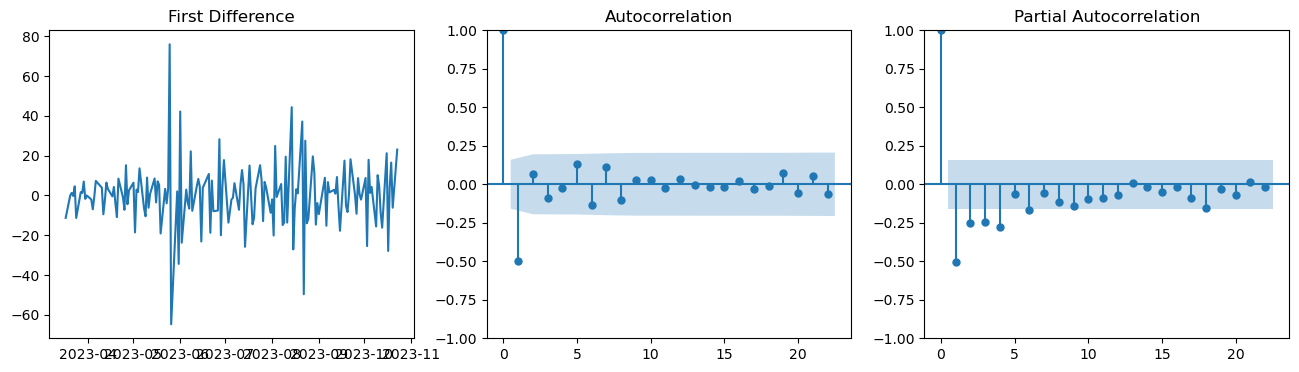

In [452]:
diff_2 = diff.diff().dropna()

fig_2, (ax1_2, ax2_2, ax3_2) = plt.subplots(1, 3, figsize=(16, 4))

ax1_2.plot(diff_2)
ax1_2.set_title("First Difference")
acf_diff_2 = plot_acf(diff_2, ax=ax2_2)
pacf_diff_2 = plot_pacf(diff_2, ax=ax3_2)

In [453]:
ADF_result_diff_2 = adfuller(diff_2)
print('ADF Statistic: %f' % ADF_result_diff_2[0])
print('p-value: %f' % ADF_result_diff_2[1])

ADF Statistic: -8.535675
p-value: 0.000000


## **Parameter D**
- ADF statistic << critical value for 1%, i.e. -3.43: data is stationary
- p-value << 0.05: data is stationary
- 2nd order differencing exhibits more consistent mean and variance, and more variation in acf and pacf, thus select d = 2

## **Parameters P, Q**

Based on the provided Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots:

1. **ACF Plot**:
   - The autocorrelation at lag 1 is significant and positive, and there's a sharp decline afterward. The autocorrelation values remain within the blue shaded region (confidence interval) from lag 2 onward, indicating non-significance.

2. **PACF Plot**:
   - The partial autocorrelation at lag 1 is significant and positive, then drops sharply and becomes negative and significant at lag 2. After lag 2, the partial autocorrelation values hover around zero and remain within the blue shaded region, indicating non-significance.

**Justification**:

- For the AR term (`p`):
  - The PACF shows significance at the first lag and a negative spike at the second lag. After the second lag, it essentially becomes non-significant. Based on this behavior, a suitable value for `p` might be `p=2`.

- For the MA term (`q`):
  - The ACF plot displays significance only at the first lag, suggesting that the series has a moving average component of order 1. Therefore, a suitable value for `q` would be `q=1`.

**Conclusion**: 
Based on the provided ACF and PACF plots, a suitable ARIMA model might have orders `(p=2, d=2, q=1)`. 

In [454]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df, order=(2,2,1))
model_fit = model.fit()
model_fit.summary()


/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramet

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  154
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -586.093
Date:                Tue, 24 Oct 2023   AIC                           1180.185
Time:                        11:34:04   BIC                           1192.281
Sample:                             0   HQIC                          1185.099
                                - 154                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0093      0.100      0.093      0.926      -0.187       0.205
ar.L2          0.0251      0.114      0.221      0.825      -0.197       0.248
ma.L1         -0.9902      0.044    -22.664      0.000      -1.076      -0.905
sigma2       127.5760      7.147     17.851      0.000     113.569     141.583
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               890.32
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             1.92
Prob(H) (two-sided):                  0.94   Kurtosis:                        14.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [455]:

step = 10
fc = model_fit.forecast(step)
print("Forecasted value from 25 October till 5 November: \n")
print(fc)

Forecasted value from 25 October till 5 November: 

154    430.564643
155    431.816279
156    432.693827
157    433.578847
158    434.454546
159    435.330346
160    436.205912
161    437.081479
162    437.957040
163    438.832601
Name: predicted_mean, dtype: float64


/Users/pangyen/anaconda3/envs/finTech-env/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2023-10-23 00:00:00


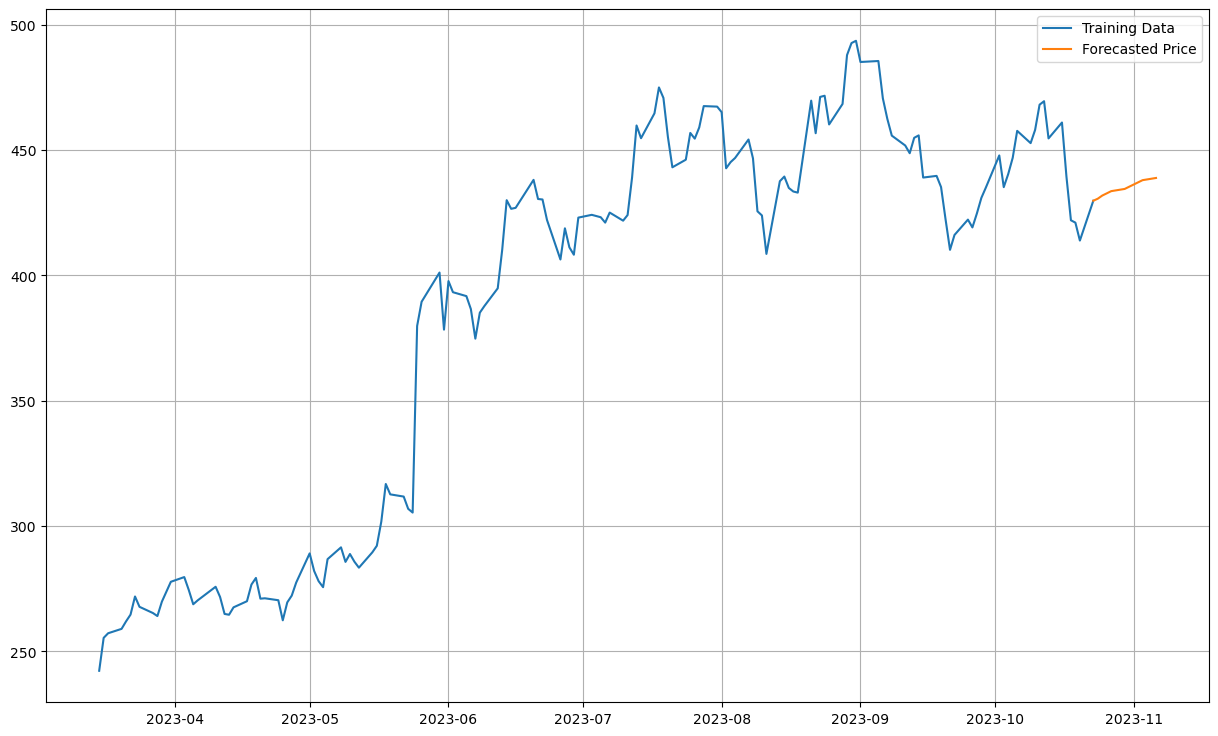

In [456]:
last_date = df.index[-1]
print(last_date)

# Create a list of dates after last date in training data to `step` periods in the future
# turn them into datetime objects
forecast_dates = pd.date_range(last_date, periods=step + 1, freq='B')[1:]
combined_dates = pd.to_datetime([last_date]).append(forecast_dates)
combined_fc = [df['Close'].iloc[-1]] + list(fc)

# plot the training data and the forecasted values
plt.figure(figsize=(15, 9))
plt.grid(True)
plt.plot(df.index, df['Close'], label='Training Data')
plt.plot(combined_dates, combined_fc, label='Forecasted Price')
plt.legend()
plt.show()
